In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [3]:
dt = pd.read_csv("Diseased_Trials.csv")

In [4]:
dis = dt.dropna()

In [5]:
dis.head()

,id,trial,healthy_field,diseased_field,date,collector,timepoint,temp,cloud_cover,colony,dish,time,diseased,healthy
0,59,2.0,2.0,1.0,3/22/21,Elliott,0.0,70.0,100.0,25.0,9.0,8:00,0.0,0.0
1,68,2.0,2.0,1.0,3/22/21,Elliott,1.0,71.0,98.0,25.0,9.0,9:00,0.0,1.0
2,77,2.0,2.0,1.0,3/22/21,Elliott,2.0,71.0,97.0,25.0,9.0,10:00,0.0,1.0
3,86,2.0,2.0,1.0,3/22/21,Elliott,4.0,76.0,95.0,25.0,9.0,12:00,0.0,1.0
4,95,2.0,2.0,1.0,03/23/21,Elliott,24.0,72.0,90.0,25.0,9.0,8:00,10.0,10.0


In [6]:
dis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 144
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              142 non-null    int64  
 1   trial           142 non-null    float64
 2   healthy_field   142 non-null    float64
 3   diseased_field  142 non-null    float64
 4   date            142 non-null    object 
 5   collector       142 non-null    object 
 6   timepoint       142 non-null    float64
 7   temp            142 non-null    float64
 8   cloud_cover     142 non-null    float64
 9   colony          142 non-null    float64
 10  dish            142 non-null    float64
 11  time            142 non-null    object 
 12  diseased        142 non-null    float64
 13  healthy         142 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory usage: 16.6+ KB


In [7]:
kmf_d = KaplanMeierFitter()
kmf_h = KaplanMeierFitter()

In [8]:
diseased = (dis['diseased'])
healthy = (dis['healthy'])

In [9]:
dis.loc[diseased == 10, 'dead_d'] = 1
dis.loc[diseased != 10, 'dead_d'] = 0
dis.loc[healthy == 10, 'dead_h'] = 1
dis.loc[healthy != 10, 'dead_h'] = 0

C:\Users\Choudhury_Lab\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Choudhury_Lab\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Choudhury_Lab\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [10]:
kmf_h.fit(durations = dis['timepoint'], event_observed = dis['dead_h'])
kmf_d.fit(durations = dis['timepoint'], event_observed = dis['dead_d'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 142 total observations, 99 right-censored observations>

In [11]:
kmf_h.event_table
kmf_d.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,29,0,29,142,142
1.0,29,3,26,0,113
2.0,28,8,20,0,84
4.0,28,11,17,0,56
24.0,28,21,7,0,28


In [12]:
kmf_h.predict([0,1,2,4,24])

0     1.000000
1     0.973451
2     0.915508
4     0.735676
24    0.183919
Name: KM_estimate, dtype: float64

In [13]:
kmf_d.predict([0,1,2,4,24])

0     1.000000
1     0.973451
2     0.880742
4     0.707739
24    0.176935
Name: KM_estimate, dtype: float64

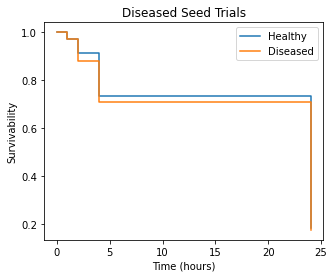

In [14]:
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(4)

kmf_h.plot(ci_show = False, label = 'Healthy')
kmf_d.plot(ci_show = False, label = 'Diseased')

plt.title("Diseased Seed Trials")
plt.xlabel('Time (hours)')
plt.ylabel('Survivability')

#plt.savefig('diseased_seedpref.jpg', bbox_inches='tight', dpi=300)
plt.legend()

# Log Rank Test

In [15]:
time = dis['timepoint']
event_h = dis['dead_h']
event_d = dis['dead_d']

In [16]:
results=logrank_test(time, time, event_h, event_d)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.19 0.66      0.60

In [17]:
print("P-value :",results.p_value) #no signifigant differences between the samples

P-value : 0.659846852958589
